In [1]:
!pip install imageio

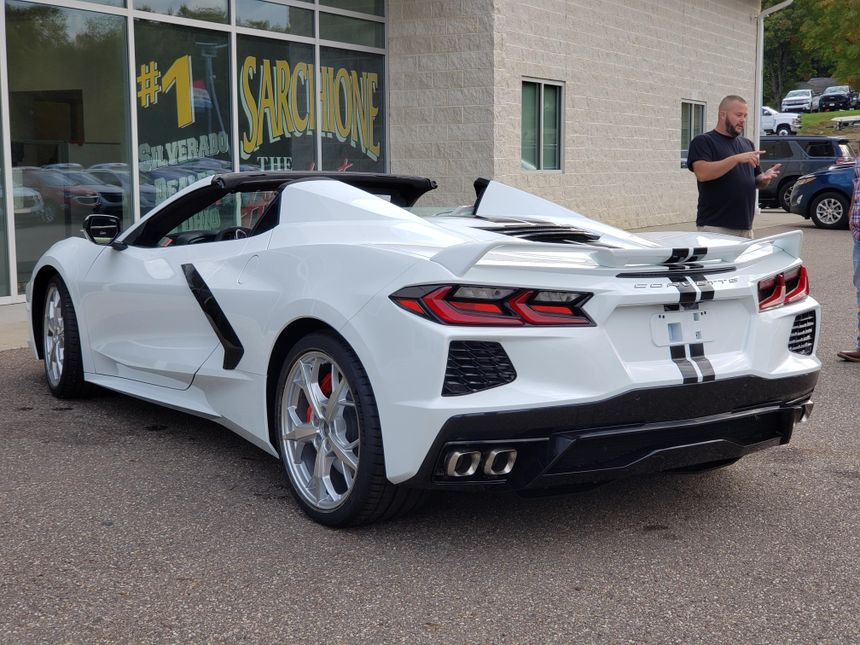

In [4]:
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp

img = "https://imgs.search.brave.com/JsJAFAvDwGiX3RSfn484HTmYXT8rkuSVCLb0JF59-E0/rs:fit:860:0:0/g:ce/aHR0cHM6Ly9pLnBp/bmltZy5jb20vb3Jp/Z2luYWxzL2YwLzZi/LzNhL2YwNmIzYWQw/OWVmNGNjNjhlYjZl/MWZiM2EwOTYyMzg1/LmpwZw"
dp.Image(requests.get(img).content)

In [6]:
source_img = imageio.imread(img)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14148\82013751.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  source_img = imageio.imread(img)


In [8]:
import numpy as np 
def grayscaleimg(rgb):
    return np.dot(rgb[...,:3],[0.299, 0.587, 0.114])
gryscl_img = grayscaleimg(source_img)

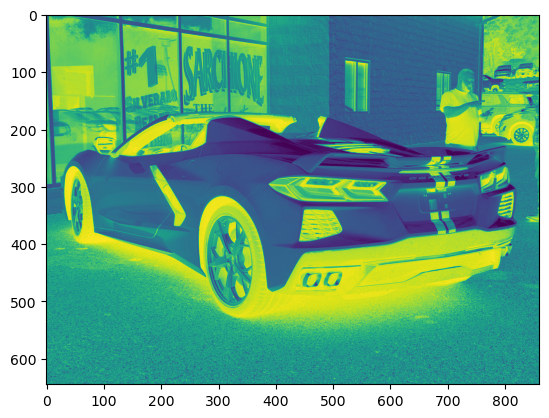

In [9]:
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14148\1565556310.py:2: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)


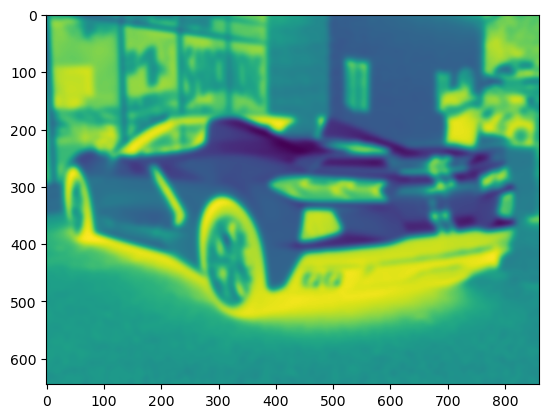

In [12]:
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

In [13]:
def dodging(blur_img,gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img)
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')

In [14]:
target_img = dodging(blurred_img, gryscl_img)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14148\3551316839.py:2: RuntimeWarning: divide by zero encountered in divide
  resultant_dodge=blur_img*255/(255-gryscl_img)


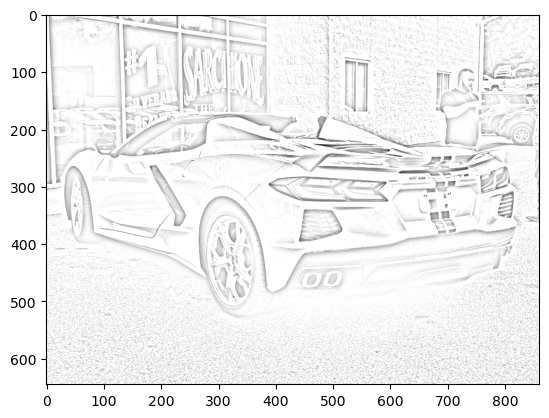

In [15]:
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap="gray")

In [16]:
plt.imsave('target_image.png', target_img, cmap='gray',vmin=0,vmax=255)